# ANALIZA PODATKOV

In [320]:
import pandas as pd
import os
import numpy as nd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

glava = ['atomsko_st', 'simbol', 'ime', 'izvor_imena', 'skupina', 'perioda', 'blok', 'rel_at_masa', 'gostota', 'talisce', 'vrelisce', 'spec_toplota', 'el_neg', 'pogostost_v_zem_skorji', 'izvor', 'agregatno']
data = pd.read_csv('elementi.csv')
data

,atomsko_st,simbol,ime,izvor_imena,skupina,perioda,blok,rel_at_masa,gostota,talisce,vrelisce,spec_toplota,el_neg,pogostost_v_zem_skorji,izvor,agregatno
0,1,H,Hydrogen,"Greek elements hydro- and -gen, 'water-forming'",1,1,s-block,1.0080,0.000090,14.01,20.28,14.304,2.20,1400,primordial,gas
1,2,He,Helium,"Greek hḗlios, 'sun'",18,1,s-block,4.0026,0.000179,NaN,4.22,5.193,NaN,0.008,primordial,gas
2,3,Li,Lithium,"Greek líthos, 'stone'",1,2,s-block,6.9400,0.534000,453.69,1560.00,3.582,0.98,20,primordial,solid
3,4,Be,Beryllium,"Beryl, a mineral (ultimately from the name of ...",2,2,s-block,9.0122,1.850000,1560.00,2742.00,1.825,1.57,2.8,primordial,solid
4,5,B,Boron,"Borax, a mineral (from Arabic bawraq, Middle P...",13,2,p-block,10.8100,2.340000,2349.00,4200.00,1.026,2.04,10,primordial,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Fl,Flerovium,"Joint Institute for Nuclear Research, part of ...",14,7,p-block,289.0000,11.400000,284.00,NaN,NaN,NaN,NaN,synthetic,unknown phase
114,115,Mc,Moscovium,"Moscow, Russia, where the element was first sy...",15,7,p-block,290.0000,13.500000,700.00,1400.00,NaN,NaN,NaN,synthetic,unknown phase
115,116,Lv,Livermorium,Lawrence Livermore National Laboratory in Live...,16,7,p-block,293.0000,12.900000,700.00,1100.00,NaN,NaN,NaN,synthetic,unknown phase
116,117,Ts,Tennessine,"Tennessee, United States, where Oak Ridge Nati...",17,7,p-block,294.0000,7.130000,700.00,883.00,NaN,NaN,NaN,synthetic,unknown phase


## 1. Povprečne, minimalne in maksimalne vrednosti

Prvo poglejmo povprečja, maksimume in munimume podatkov.

In [321]:
brez_mankajocih = data[data[glava].notnull()]
print(brez_mankajocih[glava[7:]].describe())

       rel_at_masa     gostota      talisce     vrelisce  spec_toplota  \
count   118.000000  118.000000   110.000000   106.000000     86.000000   
mean    146.488371    9.112281  1243.016587  2457.745094      0.629674   
std      89.686261    6.873986   884.094426  1605.182567      1.645245   
min       1.008000    0.000090    14.010000     4.220000      0.094000   
25%      66.465750    3.750500   510.560000  1055.000000      0.165750   
50%     142.575000    8.065000  1120.000000  2554.000000      0.243500   
75%     226.750000   12.440000  1801.250000  3556.500000      0.486500   
max     294.000000   27.000000  4000.000000  5869.000000     14.304000   

          el_neg  
count  99.000000  
mean    1.717677  
std     0.624679  
min     0.790000  
25%     1.245000  
50%     1.610000  
75%     2.130000  
max     3.980000  


## 2. Analiza po periodah in skupinah

Poglejmo kako se obnašajo nekatere lastnosti, glede na periodo in skupino

### 2.1 Po periodah

#### 2.1.1 Gostota

In [322]:
data_period = data.groupby('perioda')
data_period.gostota.mean()

perioda
1     0.000134
2     0.874534
3     1.454123
4     5.392197
5     7.415994
6    10.673820
7    15.140937
Name: gostota, dtype: float64

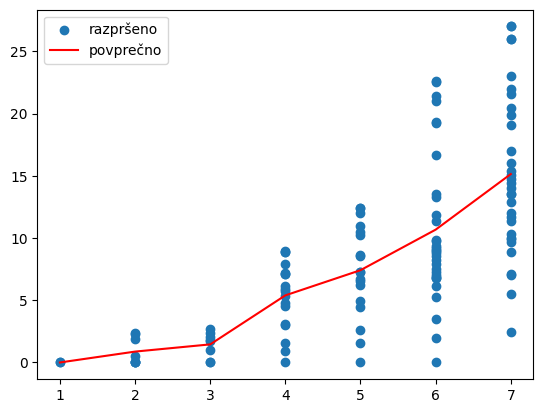

In [323]:
plt.scatter(data['perioda'],data['gostota'], label = 'razpršeno')
plt.plot(data_period['gostota'].mean(), color = 'red', label = 'povprečno')
plt.legend()
plt.show()

Pri gostoti se zelo lepo vidi, da s periodo narašča.

#### 2.1.2 Tališče

In [382]:
data_period.talisce.mean()

perioda
1     233.850000
2     650.056250
3    1550.250000
4    2610.666667
5    1457.500714
6     643.763697
7    1223.124687
Name: talisce, dtype: float64

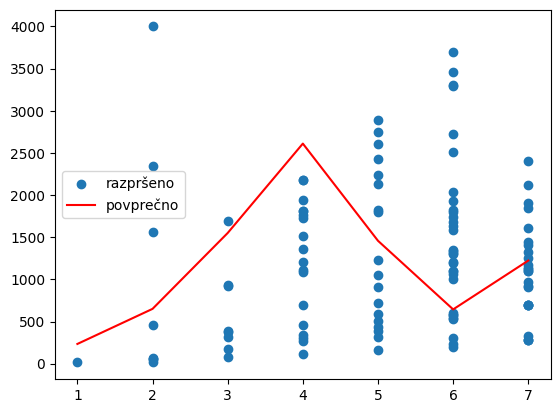

In [381]:
plt.scatter(data['perioda'],data['talisce'], label = 'razpršeno')
plt.plot(data_period['talisce'].mean(), color = 'red', label = 'povprečno')
plt.legend()
plt.show()

#### 2.1.3 Elektro negativnost

In [383]:
data_period.el_neg.mean()

perioda
1    1.590000
2    1.034286
3    1.178750
4    1.794286
5    2.038462
6    2.342500
7    1.366452
Name: el_neg, dtype: float64

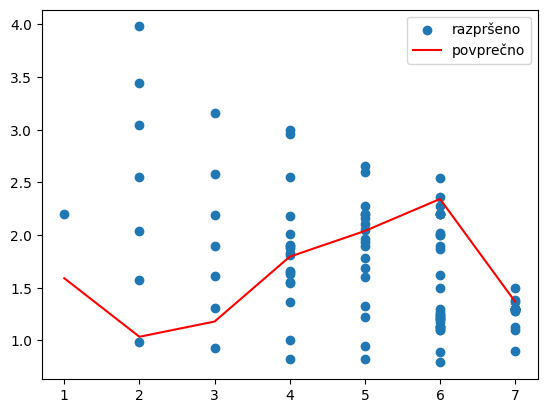

In [384]:
plt.scatter(data['perioda'],data['el_neg'], label = 'razpršeno')
plt.plot(data_period['el_neg'].mean(), color = 'red', label = 'povprečno')
plt.legend()
plt.show()

Kljub temu, da povprečna elektro negativnost ne kaže vzorca, se vidi da se z višanjem periode, znotraj periode podatki manj razlikujejo.

### 2.2 Po skupinah

In [326]:
data['str_len_sk'] = data['skupina'].str.len()
data.sort_values(by =['str_len_sk', 'skupina'], ascending = True, inplace = True)

#### 2.2.1 Gostota

In [327]:
data_skupina = data.groupby('skupina', sort = False)
data_skupina.gostota.mean()

skupina
1                  1.190584
2                  2.798000
3                  7.924500
4                 10.334000
5                 13.242500
6                 14.920000
7                 16.307500
8                 17.478500
9                 17.717500
10                17.095250
11                15.187500
12                10.831000
13                 7.685000
14                 6.654000
15                 6.254708
16                 5.869572
17                 4.015033
18                 1.003177
f-block groups    10.574357
Name: gostota, dtype: float64

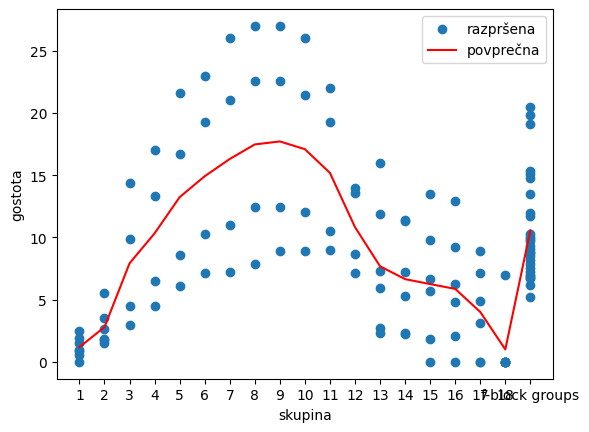

In [328]:
plt.scatter(data['skupina'],data['gostota'], label = 'razpršena')
plt.plot(data_skupina['gostota'].mean(), color = 'red', label = 'povprečna')
plt.xlabel('skupina')
plt.ylabel('gostota')
plt.legend()
plt.show()


Vidimo, da

In [329]:
data_skupina.talisce.mean()

skupina
1                  295.735714
2                 1103.500000
3                 1859.500000
4                 2243.750000
5                 2741.000000
6                 2923.666667
7                 2469.333333
8                 2574.666667
9                 2241.333333
10                1865.816667
11                1310.010000
12                 451.132500
13                 882.022433
14                1381.348333
15                 603.155000
16                 474.230000
17                 358.796667
18                 152.091667
f-block groups    1369.135714
Name: talisce, dtype: float64

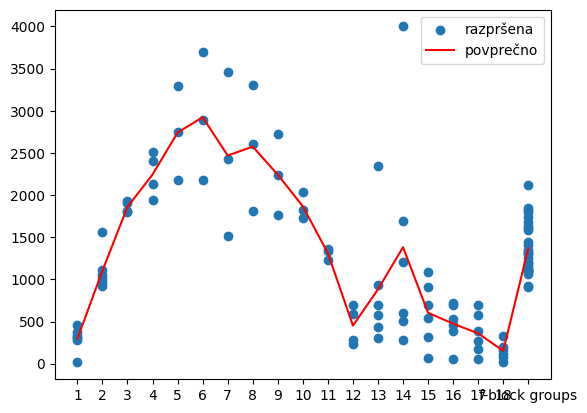

In [330]:
plt.scatter(data['skupina'],data['talisce'], label = 'razpršena')
plt.plot(data_skupina['talisce'].mean(), color = 'red', label = 'povprečno')
plt.legend()
plt.show()


## 3. Tortni grafo

Prvo napišemo funkcijo, ki nam bo preštela pojavitve ključev v stolpcih, zato da lahko s temi informacijami narišemo grafe.

In [336]:
def prestej(stolpec):
    pojavitve = {}
    for x in stolpec:
        if x in pojavitve:
            pojavitve[x] += 1
        else:
            pojavitve[x] = 1
    imena = []
    vrednosti = []
    for x,y in pojavitve.items():
        imena.append(x)
        vrednosti.append(y)
    return imena, vrednosti


### 3.1 Agregatna stanja

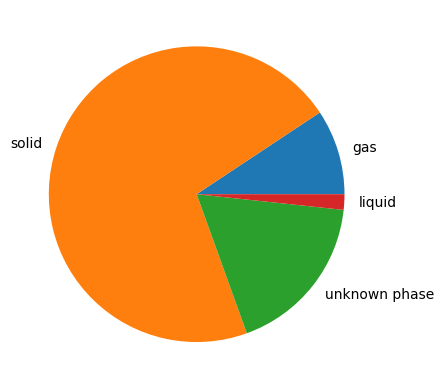

In [340]:
imena, vrednosti = prestej(data.agregatno)

plt.pie(vrednosti, labels = imena)
plt.show()

Vidimo, da je velika večina elementov pri sobni temperaturi v trdnem stanju, dokaj velik del nepoznanih in le redki v tekočem. Predvidevam, da so elementi z nepoznanimi agregatnimi stanji sintetično ustvarjeni in zato nestabilni, zaradi česar ne poznamo njihovih agregatnih stanj.
To lahko hitro preverimo:

In [351]:
unknown = 0
ujema = 0
for i in range(len(data.agregatno)):
    if data.agregatno[i] == 'unknown phase':
        unknown += 1
    if data.agregatno[i] == 'unknown phase' and data.izvor[i] == 'synthetic':
        ujema += 1

print(f'Vseh elementov z nepoznanim agregatnim stanjem je {unknown}, od teh jih je {ujema} sintetično ustvarjenih')

Vseh elementov z nepoznanim agregatnim stanjem je 21, od teh jih je 19 sintetično ustvarjenih


Vidimo, da je velik del takih elementov res sintetično ustvarjenih.

### 3.2 Izvor

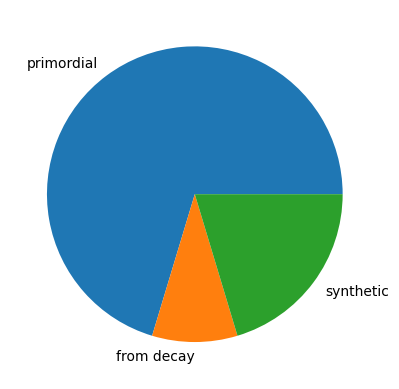

In [352]:
imena, vrednosti = prestej(data.izvor)

plt.pie(vrednosti, labels = imena)
plt.show()

## 4. Atomsko število

Poglejmo kaj se dogaja z različnimi lastnostmi, ko se viša atomsko število.

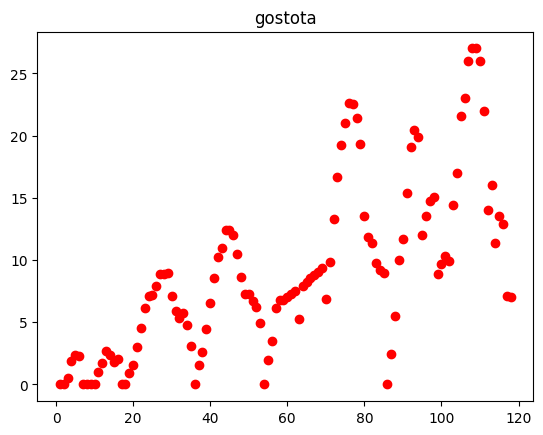

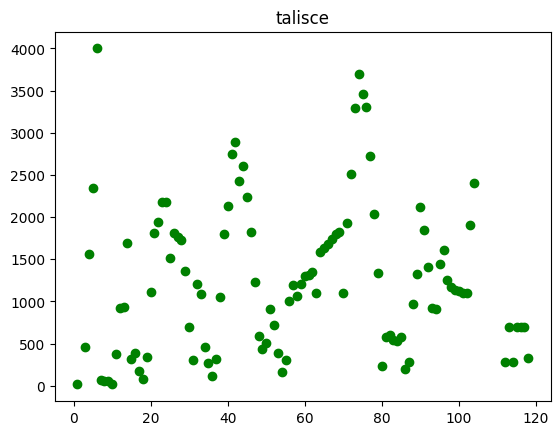

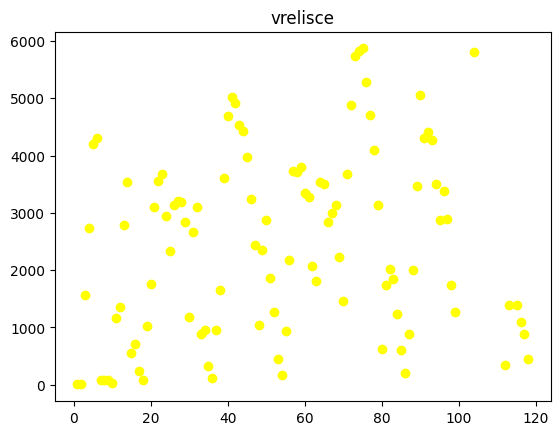

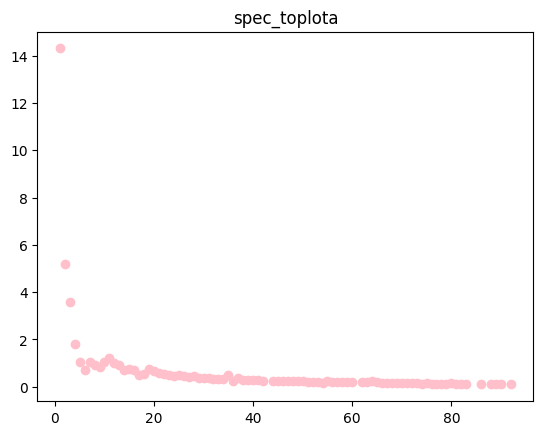

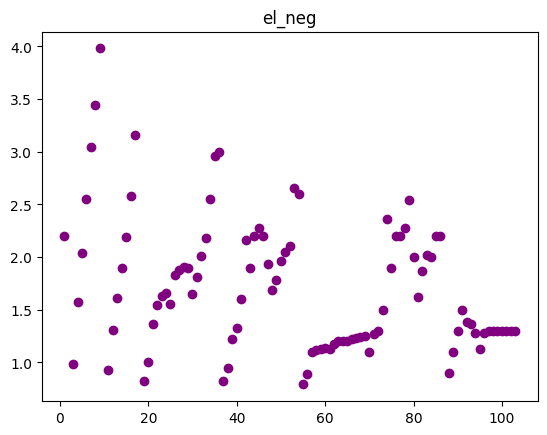

In [364]:
plt.scatter(data.atomsko_st, data[glava[8]], color ='red')
plt.title(glava[8])
plt.show()
plt.scatter(data.atomsko_st, data[glava[9]], color ='green')
plt.title(glava[9])
plt.show()
plt.scatter(data.atomsko_st, data[glava[10]], color ='yellow')
plt.title(glava[10])
plt.show()
plt.scatter(data.atomsko_st, data[glava[11]], color ='pink')
plt.title(glava[11])
plt.show()
plt.scatter(data.atomsko_st, data[glava[12]], color ='purple')
plt.title(glava[12])
plt.show()

Pri gostoti se lepo vidi, da kljub razpršenosti, vrednosti rastejo. Pri vrelišču in tališču se trend bolj slabo vidi, a zgleda, kot da počasi raste. Secifična toplota zelo hitro pade in se približuje nič. Elektro negativnost pa je tako kot gostota dokaj razpršena, a se vidi da vrednosti padajo.

## 5. Resna analiza

In [369]:
def prestej_prve_crke(stolpec):
    pojavitve = {}
    for x in stolpec:
        if x[0] in pojavitve:
            pojavitve[x[0]] += 1
        else:
            pojavitve[x[0]] = 1
    simboli = []
    vrednosti = []
    for x,y in pojavitve.items():
        simboli.append(x)
        vrednosti.append(y)
    return simboli, vrednosti

Sedaj si pa poglejmo, katere crke so najbolj priljubljene za začet simbol.

['H', 'L', 'N', 'K', 'R', 'C', 'F', 'B', 'M', 'S', 'Y', 'T', 'Z', 'V', 'D', 'W', 'O', 'I', 'P', 'A', 'G', 'X', 'E', 'U']
[6, 5, 9, 2, 8, 12, 5, 7, 6, 9, 2, 9, 2, 1, 3, 1, 3, 3, 9, 8, 3, 1, 3, 1]


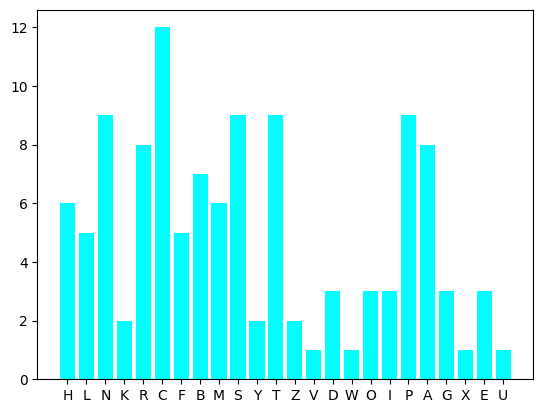

In [378]:
simboli, vrednosti = prestej_prve_crke(data.simbol)
print(simboli)
print(vrednosti)
plt.bar(simboli, vrednosti, color = 'cyan')
plt.show()

Očitno se vidi, da so nekatere črke bolj popularne kot druge pri začenjanju simbolov, nekaterih, kot naprimer J pa sploh ni.